<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#认识-image-captioning-数据集" data-toc-modified-id="认识-image-captioning-数据集-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>认识 image captioning 数据集</a></span></li><li><span><a href="#image-captioning-model" data-toc-modified-id="image-captioning-model-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>image captioning model</a></span></li></ul></div>

## 认识 image captioning 数据集

In [1]:
from PIL import Image

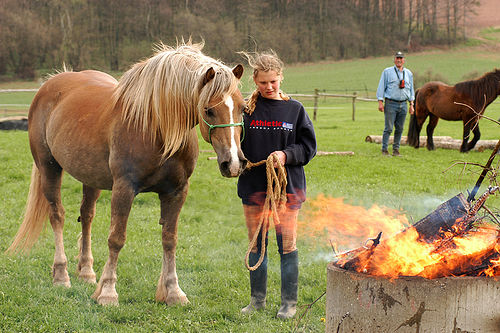

In [2]:
img1 = Image.open('./flickr8r-samples/10815824_2997e03d76.jpg')
img1

In [3]:
!cat ./flickr8r-samples/captions.txt | grep 10815824_2997e03d76.jpg

10815824_2997e03d76.jpg,A blonde horse and a blonde girl in a black sweatshirt are staring at a fire in a barrel .
10815824_2997e03d76.jpg,A girl and her horse stand by a fire .
10815824_2997e03d76.jpg,A girl holding a horse 's lead behind a fire .
10815824_2997e03d76.jpg,"A man , and girl and two horses are near a contained fire ."
10815824_2997e03d76.jpg,Two people and two horses watching a fire .


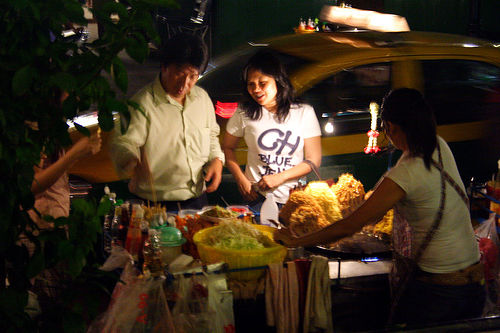

In [4]:
img2 = Image.open('./flickr8r-samples/33108590_d685bfe51c.jpg')
img2

In [5]:
!cat ./flickr8r-samples/captions.txt | grep 33108590_d685bfe51c

33108590_d685bfe51c.jpg,A young couple inspect merchandise from a street vendor .
33108590_d685bfe51c.jpg,People are gathering around a table of food and outside a taxi wisks by .
33108590_d685bfe51c.jpg,Three people prepare a table full of food with a police car in the background .
33108590_d685bfe51c.jpg,two people look at a street vendor .
33108590_d685bfe51c.jpg,Two women and a man at a food counter in dim lights .


In [6]:
print(img1.size)
print(img2.size)
print(img1.mode)
print(img2.mode)

(500, 333)
(500, 333)
RGB
RGB


## image captioning model

In [8]:
import torch
from transformers import BlipProcessor, BlipForConditionalGeneration
from PIL import Image

In [9]:
device = 'cuda:0'

In [11]:
processor = BlipProcessor.from_pretrained("Salesforce/blip-image-captioning-base")
model = BlipForConditionalGeneration.from_pretrained("Salesforce/blip-image-captioning-base", 
                                                     torch_dtype=torch.float16).to(device)


In [17]:
# processor forward
img_inputs = processor([Image.open('./flickr8r-samples/33108590_d685bfe51c.jpg'), 
                        Image.open('./flickr8r-samples/10815824_2997e03d76.jpg')], 
                       return_tensors='pt').to(device, torch.float16)

In [18]:
img_inputs['pixel_values'].shape

torch.Size([2, 3, 384, 384])

In [21]:
out = model.generate(**img_inputs)

In [22]:
out

tensor([[30522,  1037,  2450,  3061,  1999,  2392,  1997,  1037,  2482,   102],
        [30522,  1037,  3586,  2003,  3061,  1999,  1996,  5568,   102,     0]],
       device='cuda:0')

In [24]:
# processor.tokenizer.convert_ids_to_tokens(out[0])
captions = processor.decode(out[0], skip_special_tokens=True)
print(captions)
captions = processor.decode(out[1], skip_special_tokens=True)
print(captions)

a woman standing in front of a car
a horse is standing in the grass


In [26]:
processor.tokenizer.special_tokens_map_extended

{'unk_token': '[UNK]',
 'sep_token': '[SEP]',
 'pad_token': '[PAD]',
 'cls_token': '[CLS]',
 'mask_token': '[MASK]'}

In [27]:
out[0]

tensor([30522,  1037,  2450,  3061,  1999,  2392,  1997,  1037,  2482,   102],
       device='cuda:0')

In [28]:
processor.tokenizer.convert_ids_to_tokens(out[0])

[None, 'a', 'woman', 'standing', 'in', 'front', 'of', 'a', 'car', '[SEP]']

In [31]:
out[1]

tensor([30522,  1037,  3586,  2003,  3061,  1999,  1996,  5568,   102,     0],
       device='cuda:0')

In [29]:
processor.tokenizer.convert_ids_to_tokens(out[1])

[None, 'a', 'horse', 'is', 'standing', 'in', 'the', 'grass', '[SEP]', '[PAD]']